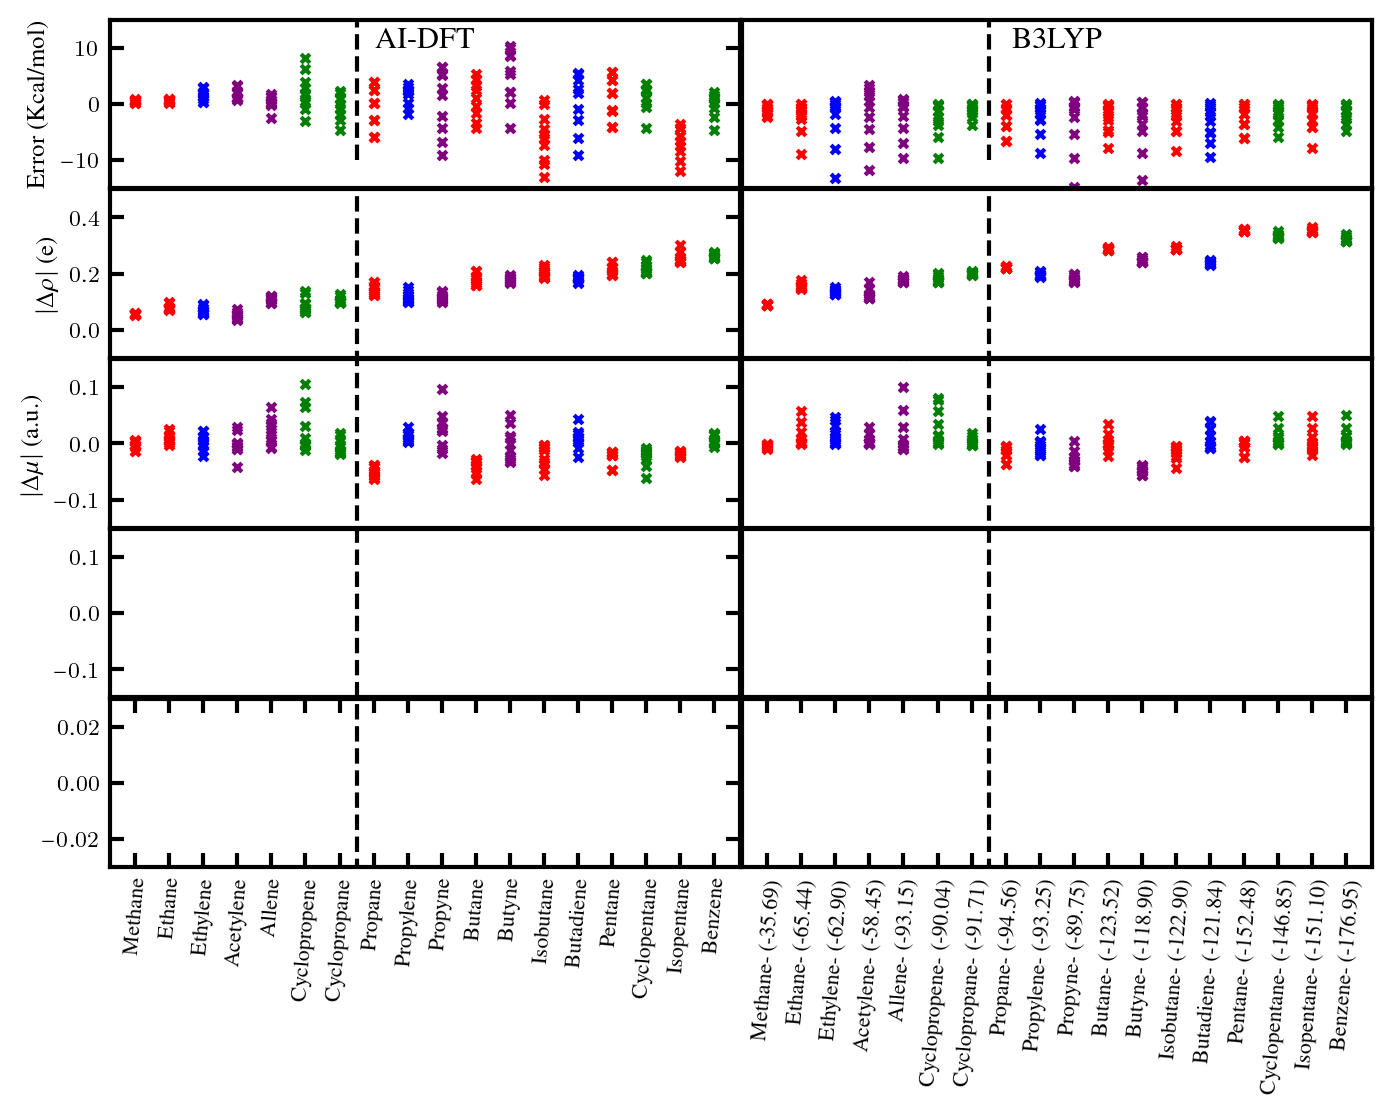

<Figure size 686.111x541.667 with 0 Axes>

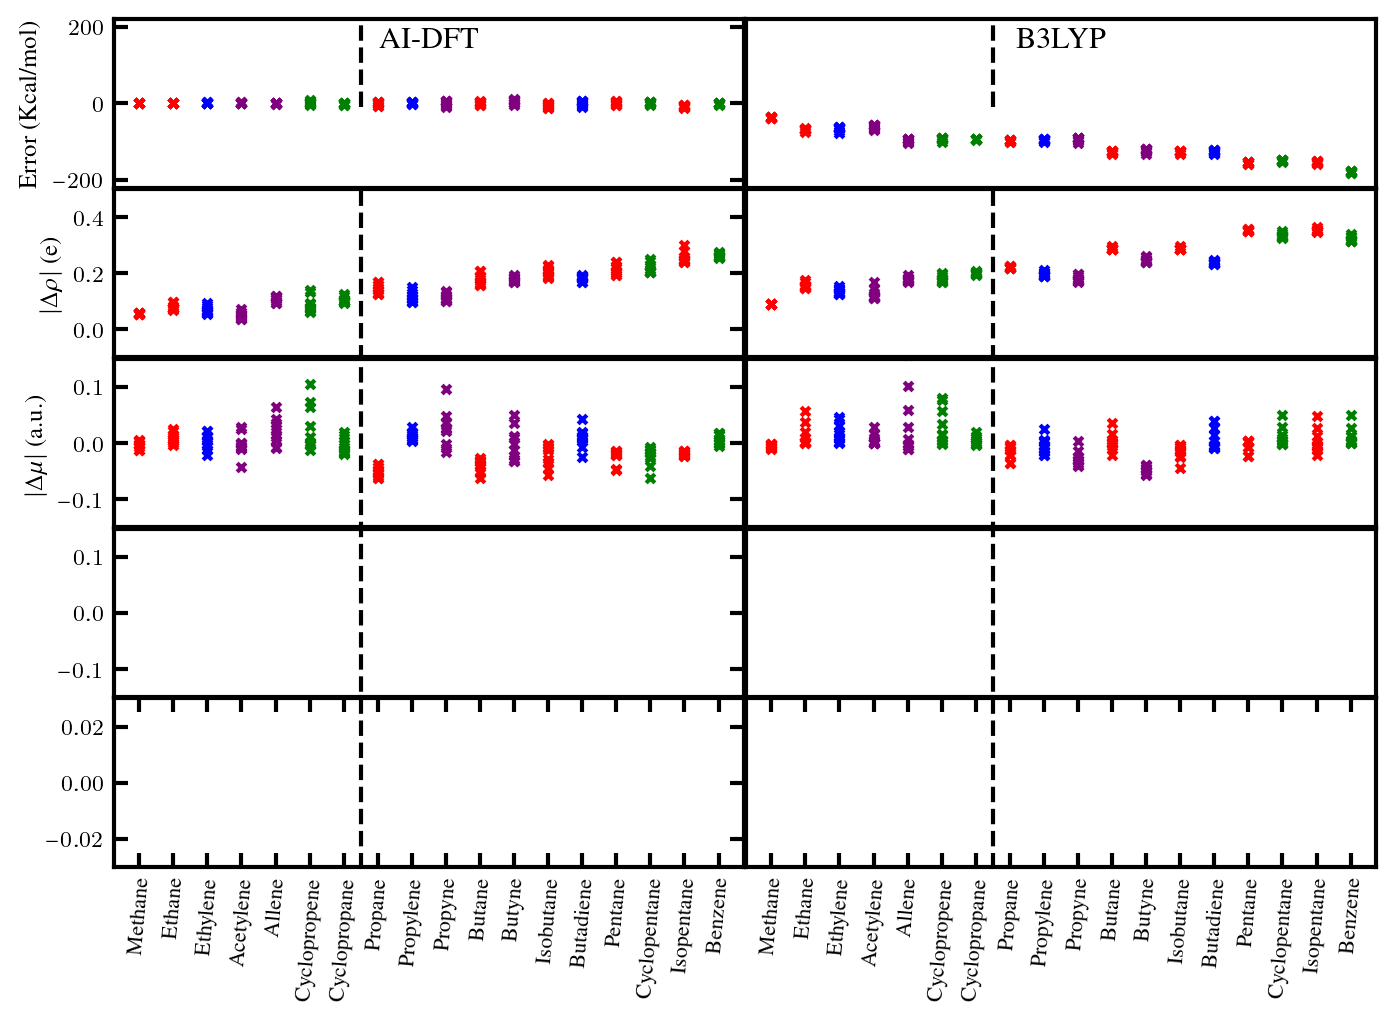

<Figure size 686.111x541.667 with 0 Axes>

In [6]:
from pathlib import Path
import datetime
from itertools import product

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

TRAIN_STR_DICT = [
    "methane",
    # "methyl-openshell",
    "ethane",
    "ethylene",
    "acetylene",
    "allene",
    "cyclopropene",
    "cyclopropane",
]
EVAL_STR_DICT = [
    "propane",
    "propylene",
    "propyne",
    "butane",
    "butyne",
    "isobutane",
    "butadiene",
    "pentane",
    "cyclopentane",
    "isopentane",
    "benzene",
]

color_classify_species = {
    "methane": "red",
    "methyl-openshell": "yellow",
    "ethane": "red",
    "ethylene": "blue",
    "acetylene": "purple",
    "cyclopropene": "green",
    "cyclopropane": "green",
    "propane": "red",
    "propylene": "blue",
    "propyne": "purple",
    "allene": "purple",
    "butane": "red",
    "butyne": "purple",
    "isobutane": "red",
    "butadiene": "blue",
    "pentane": "red",
    "cyclopentane": "green",
    "isopentane": "red",
    "benzene": "green",
}

from matplotlib import rcParams
from matplotlib import rc


rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})
rc("text", usetex=True)
rc("font", family="serif")

rcParams["text.latex.preamble"] = thesis_latex

fontsize = 10.045
sca_size = 2
plt.rc("font", size=fontsize)  # controls default text size
plt.rc("axes", titlesize=fontsize)  # fontsize of the title
plt.rc("axes", labelsize=fontsize - 1)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=fontsize - 2)  # fontsize of the x tick labels
plt.rc("ytick", labelsize=fontsize - 2)  # fontsize of the y tick labels
plt.rc("legend", fontsize=fontsize)  # fontsize of the legend

rcParams["axes.linewidth"] = 1.5
rcParams["lines.linewidth"] = 1.5
rcParams["xtick.major.width"] = 3
rcParams["xtick.minor.size"] = 5
rcParams["xtick.major.size"] = 5
rcParams["ytick.minor.size"] = 5
rcParams["ytick.major.size"] = 5
rcParams["xtick.minor.width"] = 1.5
rcParams["xtick.major.width"] = 1.5
rcParams["ytick.minor.width"] = 1.5
rcParams["ytick.major.width"] = 1.5

plt.rcParams["figure.figsize"] = np.array([0.95, 0.75]) * 520 / 72

model_number_l = [
    # "ccdft_2024-07-28-16-00-16_64_4_0",
    # "ccdft_2024-08-18-23-05-52_128_3_-1",
    # "ccdft_2024-08-24-17-46-19_64_4_0",
    # "ccdft_2024-09-03-16-44-05_64_4_-1_171",
    # "ccdft_2024-09-09-16-29-00_64_4_0",
    # "ccdft_2024-09-09-16-31-49_64_4_0",
    # "ccdft_2024-09-09-16-29-00_64_4_-1",
    "ccdft_2024-09-09-16-31-49_64_4_0.-1",
]


for shift, model_number in product([True, False], model_number_l):
    f, axes = plt.subplots(5, 2)
    axes = axes.reshape(5, 2)

    begin_y = 0.2125
    end_y = 0.995
    int_y = 0.00125
    begin_x = 0.075
    end_x = 0.995
    int_x = 0.00125
    end_x += int_x
    end_y += int_y

    shapexy = np.shape(axes)
    inter_x = np.linspace(begin_x, end_x, shapexy[1] + 1)
    inter_y = np.linspace(begin_y, end_y, shapexy[0] + 1)

    delta_x = inter_x[1] - inter_x[0] - int_x
    delta_y = inter_y[1] - inter_y[0] - int_y

    for i in range(shapexy[0]):
        for j in range(shapexy[1]):
            axes[i][j].set_position(
                [
                    inter_x[j],
                    inter_y[i],
                    inter_x[j + 1] - inter_x[j] - int_x,
                    inter_y[i + 1] - inter_y[i] - int_y,
                ]
            )
            axes[i][j].xaxis.set_tick_params(
                direction="in", which="both", bottom=True, top=True
            )
            axes[i][j].yaxis.set_tick_params(
                direction="in", which="both", left=True, right=True
            )

    axes = axes[::-1, :]

    load_name = f"../validate/{model_number}"
    load_path = Path(f"{load_name}")

    data = pd.read_csv(load_path)
    data_dft = pd.read_csv(f"../validate/tz_dft")
    # data_dft = pd.read_csv(f"../validate/dz_dft")

    loss_scf_ene_l, loss_dft_ene_l, loss_scf_rho_l, loss_dft_rho_l = [], [], [], []
    loss_scf_dipole_x_l, loss_dft_dipole_x_l = [], []
    loss_scf_dipole_y_l, loss_dft_dipole_y_l = [], []
    loss_scf_dipole_z_l, loss_dft_dipole_z_l = [], []

    TOTAL_DICT = TRAIN_STR_DICT + EVAL_STR_DICT
    TOTAL_DICT_DFT = TRAIN_STR_DICT + EVAL_STR_DICT

    number_draw = 0

    for dict_ in [TRAIN_STR_DICT, EVAL_STR_DICT]:
        for i_name in dict_:
            data_tmp = data.loc[data["name"].str.match(i_name)]
            data_eq1 = data_dft.loc[data_dft["name"].str.match(i_name)]
            data_eq = data_eq1.loc[data_eq1["name"].str.contains(f"0_1_0.0000")]

            data_loss_scf_ene = data_tmp["error_scf_ene"]
            data_loss_dft_ene = data_tmp["error_dft_ene"]
            if shift:
                data_loss_dft_ene = data_loss_dft_ene - np.mean(
                    data_eq["error_dft_ene"]
                )
                TOTAL_DICT_DFT[
                    number_draw
                ] += f"- ({data_eq['error_dft_ene'].values[0]:.2f})"

            data_loss_scf_rho = data_tmp["error_scf_rho_r"]
            data_loss_dft_rho = data_tmp["error_dft_rho_r"]

            data_loss_scf_dipole_x = data_tmp["dipole_x_diff_scf"]
            data_loss_dft_dipole_x = data_tmp["dipole_x_diff_dft"]
            data_loss_scf_dipole_y = data_tmp["dipole_y_diff_scf"]
            data_loss_dft_dipole_y = data_tmp["dipole_y_diff_dft"]
            data_loss_scf_dipole_z = data_tmp["dipole_z_diff_scf"]
            data_loss_dft_dipole_z = data_tmp["dipole_z_diff_dft"]

            loss_scf_ene_l.append(data_loss_scf_ene.mean())
            loss_dft_ene_l.append(data_loss_dft_ene.mean())
            loss_scf_rho_l.append(data_loss_scf_rho.mean())
            loss_dft_rho_l.append(data_loss_dft_rho.mean())
            loss_scf_dipole_x_l.append(data_loss_scf_dipole_x.mean())
            loss_dft_dipole_x_l.append(data_loss_dft_dipole_x.mean())
            loss_scf_dipole_y_l.append(data_loss_scf_dipole_y.mean())
            loss_dft_dipole_y_l.append(data_loss_dft_dipole_y.mean())
            loss_scf_dipole_z_l.append(data_loss_scf_dipole_z.mean())
            loss_dft_dipole_z_l.append(data_loss_dft_dipole_z.mean())

            name_list = data_tmp["name"].values
            for i in range(len(name_list)):
                name_list[i] = float(name_list[i].split("_")[-1])

            color = color_classify_species[i_name]
            axes[0, 0].scatter(
                np.zeros_like(data_loss_scf_ene) + number_draw,
                data_loss_scf_ene,
                s=10,
                marker="x",
                color=color,
            )
            axes[1, 0].scatter(
                np.zeros_like(data_loss_scf_rho) + number_draw,
                data_loss_scf_rho,
                s=10,
                marker="x",
                color=color,
            )
            axes[2, 0].scatter(
                np.zeros_like(data_loss_scf_dipole_x) + number_draw,
                data_loss_scf_dipole_x + data_loss_scf_dipole_y + data_loss_scf_dipole_z,
                s=10,
                marker="x",
                color=color,
            )

            axes[0, 1].scatter(
                np.zeros_like(data_loss_dft_ene) + number_draw,
                data_loss_dft_ene,
                s=10,
                marker="x",
                color=color,
            )
            axes[1, 1].scatter(
                np.zeros_like(data_loss_dft_rho) + number_draw,
                data_loss_dft_rho,
                s=10,
                marker="x",
                color=color,
            )
            axes[2, 1].scatter(
                np.zeros_like(data_loss_dft_dipole_x) + number_draw,
                data_loss_dft_dipole_x + data_loss_dft_dipole_y + data_loss_dft_dipole_z,
                s=10,
                marker="x",
                color=color,
            )

            number_draw += 1

    for i_row in range(axes.shape[0]):
        for i_col in range(axes.shape[1]):
            axes[i_row, i_col].vlines(
                len(TRAIN_STR_DICT) - 0.5, -10, 1000, colors="k", linestyles="--"
            )

    for i_row in range(axes.shape[0]):
        for i_col in range(axes.shape[1]):
            axes[i_row, i_col].set_xticks([])
            axes[i_row, -1].set_yticks([])
            axes[i_row, i_col].set_xlim(-0.75, len(TOTAL_DICT) - 0.25)

    axes[-1, 0].set_xticks(
        range(len(TOTAL_DICT)),
        [i.title() for i in (TOTAL_DICT)],
        rotation=85,
    )
    if shift:
        axes[-1, 1].set_xticks(
            range(len(TOTAL_DICT_DFT)),
            [i.title() for i in (TOTAL_DICT_DFT)],
            rotation=85,
        )
    else:
        axes[-1, 1].set_xticks(
            range(len(TOTAL_DICT)),
            [i.title() for i in (TOTAL_DICT)],
            rotation=85,
        )

    axes[0, 0].set_ylabel("Error (Kcal/mol)")
    axes[1, 0].set_ylabel(r"$|\Delta \rho|$ (e)")
    axes[2, 0].set_ylabel(r"$|\Delta \mu|$ (a.u.)")

    for i_col in range(2):
        if shift:
            axes[0, i_col].set_ylim(-15, 15)
        else:
            axes[0, i_col].set_ylim(-220, 220)
        axes[1, i_col].set_ylim(-0.1, 0.5)
        axes[2, i_col].set_ylim(-0.15, 0.15)
        axes[3, i_col].set_ylim(-0.15, 0.15)
        axes[4, i_col].set_ylim(-0.03, 0.03)

    # axes[0, 1].set_ylim(-15, 150)
    # axes[0, 1].set_ylabel("Error (mHa)")
    # axes[1, 1].set_ylim(-50, 550)
    # axes[1, 1].set_ylabel("Error (me)")shift

    axes[0, 0].text(
        0.5,
        0.875,
        f"AI-DFT",
        ha="center",
        va="center",
        transform=axes[0, 0].transAxes,
        fontsize=fontsize + 1,
    )
    axes[0, 1].text(
        0.5,
        0.875,
        f"B3LYP",
        ha="center",
        va="center",
        transform=axes[0, 1].transAxes,
        fontsize=fontsize + 1,
    )

    if shift:
        plt.savefig(f"../manu/figures/{model_number}.pdf")
    else:
        plt.savefig(f"../manu/figures/{model_number}-no_shift.pdf")
    plt.show()
    plt.clf()

In [6]:
import numpy as np
import numpy.linalg as LA
data = np.random.random((302, 302))
eigenval, eigenvector = LA.eig(data)
print(
    np.linalg.norm(eigenvector @ np.diag(eigenval) @ np.linalg.inv(eigenvector) - data)
)

1.880863599935962e-11


In [10]:
list_str = []
for distance in np.linspace(-0.5, 0.5, 31):
    list_str.append(f"{distance:.4f}")

list_str1 = []
list_str2 = []
for distance in np.linspace(-0.4667, 0.4333, 10):
    list_str1.append(f"{distance:.4f}")
print("")
for distance in np.linspace(-0.4333, 0.4667, 10):
    list_str2.append(f"{distance:.4f}")

In [11]:
print(list_str)
print(list_str1, list_str2)

['-0.5000', '-0.4667', '-0.4333', '-0.4000', '-0.3667', '-0.3333', '-0.3000', '-0.2667', '-0.2333', '-0.2000', '-0.1667', '-0.1333', '-0.1000', '-0.0667', '-0.0333', '0.0000', '0.0333', '0.0667', '0.1000', '0.1333', '0.1667', '0.2000', '0.2333', '0.2667', '0.3000', '0.3333', '0.3667', '0.4000', '0.4333', '0.4667', '0.5000']
['-0.4667', '-0.3667', '-0.2667', '-0.1667', '-0.0667', '0.0333', '0.1333', '0.2333', '0.3333', '0.4333'] ['-0.4333', '-0.3333', '-0.2333', '-0.1333', '-0.0333', '0.0667', '0.1667', '0.2667', '0.3667', '0.4667']


In [8]:
import itertools

LIST_OF_GPU = itertools.cycle([7])

next(LIST_OF_GPU)

7